In [61]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


class Network(nn.Module):
    """
    三层神经网络: 3 * 4 * 2
    """

    def __init__(self, n_in, n_hidden, n_out):
        super(Network, self).__init__()
        self.layer1 = nn.Linear(n_in, n_hidden)
        self.layer2 = nn.Linear(n_hidden, n_out)

    def forward(self, x):
        z2 = self.layer1(x)
        a2 = torch.sigmoid(z2)
        y = self.layer2(a2)
        return y


def plot_scatter(X, Y, color):
    plt.scatter(X, Y, c=color)
    plt.title('Sine Wave')

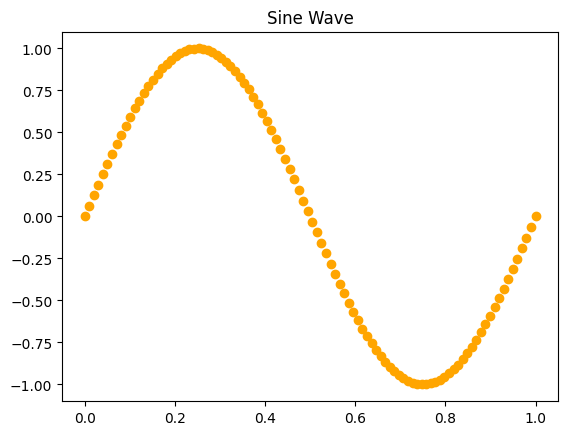

In [62]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 1, 100)
y = np.sin(x * 2 * np.pi)

X = x.reshape(-1, 1)  # 列向量, 100行1列, 每行表示一个样本
Y = y.reshape(-1, 1)  # 列向量, 100行1列, 每行表示一个标签值
plot_scatter(X, Y, 'orange')

In [77]:
import torch

X_train = torch.tensor(X, dtype=torch.float32)
Y_true = torch.tensor(Y, dtype=torch.float32)

model = Network(1, 10, 1)  # 3 层神经网络
critierion = nn.MSELoss()  # 均方误差损失函数
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)  # Adam优化器

for epoch in range(100000):
    optimizer.zero_grad()
    Y_hat = model(X_train)
    loss = critierion(Y_hat, Y_true)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f'Epoch: {epoch}, Loss: {loss.item()}')

Epoch: 0, Loss: 1.005710244178772
Epoch: 1000, Loss: 6.588689575437456e-05
Epoch: 2000, Loss: 3.46831620845478e-05
Epoch: 3000, Loss: 2.5412848117412068e-05
Epoch: 4000, Loss: 0.0066185202449560165
Epoch: 5000, Loss: 1.487692952650832e-05
Epoch: 6000, Loss: 1.174896715383511e-05
Epoch: 7000, Loss: 9.595759365765844e-06
Epoch: 8000, Loss: 8.95240646059392e-06
Epoch: 9000, Loss: 6.969223250052892e-06
Epoch: 10000, Loss: 8.683160558575764e-06
Epoch: 11000, Loss: 5.506690285983495e-06
Epoch: 12000, Loss: 5.993832019157708e-06
Epoch: 13000, Loss: 4.9807554205472115e-06
Epoch: 14000, Loss: 1.5786705262144096e-05
Epoch: 15000, Loss: 4.841926511289785e-06
Epoch: 16000, Loss: 9.158289321931079e-05
Epoch: 17000, Loss: 5.349354523787042e-06
Epoch: 18000, Loss: 4.549772711470723e-06
Epoch: 19000, Loss: 4.382472070574295e-06
Epoch: 20000, Loss: 4.1224438973586075e-06
Epoch: 21000, Loss: 3.7622792206093436e-06
Epoch: 22000, Loss: 2.1071380615467206e-05
Epoch: 23000, Loss: 3.064862085011555e-06
Epoch

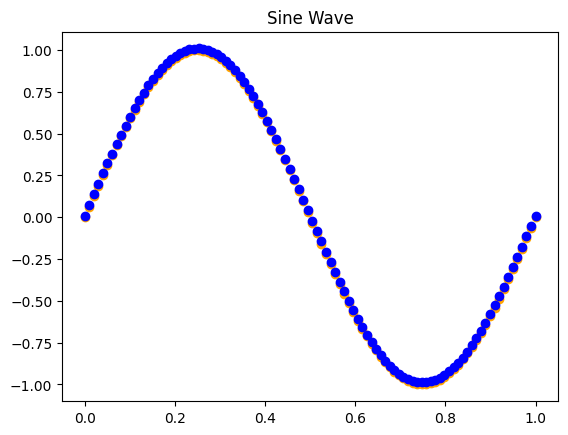

In [79]:
# 绘制图像
h = model(X_train).detach().numpy()
plot_scatter(X, Y, 'orange')
plot_scatter(X, h, 'blue')